# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from newsapi import NewsApiClient
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/wesleysapone/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv("api.env")

# Create a newsapi client
newsapi = NewsApiClient(api_key=os.environ["NEWS_API_KEY"])


Python-dotenv could not parse statement starting at line 19
Python-dotenv could not parse statement starting at line 21
Python-dotenv could not parse statement starting at line 23


In [4]:
# Fetch the Bitcoin news articles
bitcoin_everything = newsapi.get_everything(q="Bitcoin", language="en")
print(f"Total articles about Bitcoin: {bitcoin_everything['totalResults']}")

Total articles about Bitcoin: 8269


In [5]:
# Fetch the Ethereum news articles
ethereum_everything = newsapi.get_everything(q="Ethereum", language="en")
print(f"Total articles about Bitcoin: {ethereum_everything['totalResults']}")

Total articles about Bitcoin: 2096


In [6]:
# Create the Bitcoin sentiment scores DataFrame
btc_sent = []

for article in bitcoin_everything["articles"]:
    try: 
        text = article["content"]
        
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sent.append({
            
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "Text": text
        })
        
    except AttributeError:
        pass
    
btc_df = pd.DataFrame(btc_sent)

cols = ["Compound", "Positive", "Negative", "Neutral", "Text"]
btc_df = btc_df[cols]

btc_df.head()

,Compound,Positive,Negative,Neutral,Text
0,-0.5574,0.000,0.110,0.890,One of the strictest crackdowns worldwide\r\nP...
1,-0.5106,0.000,0.142,0.858,The hacker behind last years big Twitter hack\...
2,0.6369,0.113,0.000,0.887,Some things are best left a mystery at least a...
3,0.0000,0.000,0.000,0.000,
4,0.8316,0.246,0.000,0.754,TL;DR: Enter the The Complete Bitcoin (BTC) In...


In [7]:
# Create the Ethereum sentiment scores DataFrame
eth_sent = []

for article in ethereum_everything["articles"]:
    try: 
        text = article["content"]
        
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sent.append({
            
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "Text": text
        })
        
    except AttributeError:
        pass
    
eth_df = pd.DataFrame(eth_sent)

cols = ["Compound", "Positive", "Negative", "Neutral", "Text"]
eth_df = eth_df[cols]

btc_df.head()

,Compound,Positive,Negative,Neutral,Text
0,-0.5574,0.000,0.110,0.890,One of the strictest crackdowns worldwide\r\nP...
1,-0.5106,0.000,0.142,0.858,The hacker behind last years big Twitter hack\...
2,0.6369,0.113,0.000,0.887,Some things are best left a mystery at least a...
3,0.0000,0.000,0.000,0.000,
4,0.8316,0.246,0.000,0.754,TL;DR: Enter the The Complete Bitcoin (BTC) In...


In [8]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,Compound,Positive,Negative,Neutral
count,18.000000,18.000000,18.000000,18.000000
mean,0.116606,0.047167,0.019278,0.878056
std,0.375023,0.068267,0.045114,0.230790
min,-0.557400,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.865250
50%,0.000000,0.000000,0.000000,0.926500
75%,0.415300,0.075250,0.000000,1.000000
max,0.831600,0.246000,0.142000,1.000000


In [9]:
# Describe the Ethereum Sentiment
eth_df.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.00000,20.000000,20.00000
mean,0.140250,0.06345,0.030750,0.90585
std,0.378420,0.05900,0.046713,0.06833
min,-0.557400,0.00000,0.000000,0.75400
25%,-0.038275,0.00000,0.000000,0.88075
50%,0.160900,0.06950,0.000000,0.91950
75%,0.411525,0.08550,0.064500,0.93825
max,0.831600,0.24600,0.145000,1.00000


### Questions:

Q: Which coin had the highest mean positive score?

A: BTC

Q: Which coin had the highest compound score?

A: BTC - 0.831

Q. Which coin had the highest positive score?

A: BTC - 0.246

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [29]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

sw_addons = {'said', 'sent', 'found', 'including', 'today','including', 'announced', 'week', 'also', 'char', 'reuters'}

In [30]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    sw = set(stopwords.words('english'))
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    
    # Remove the stop words
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addons)]
    
    return tokens

In [31]:
# Create a new tokens column for Bitcoin
btc_df["tokens"] = btc_df['Text'].apply(tokenizer)
btc_df.head()

,Compound,Positive,Negative,Neutral,Text,tokens
0,-0.5574,0.000,0.110,0.890,One of the strictest crackdowns worldwide\r\nP...,"[one, strictest, crackdown, worldwidephoto, mi..."
1,-0.5106,0.000,0.142,0.858,The hacker behind last years big Twitter hack\...,"[hacker, behind, last, year, big, twitter, hac..."
2,0.6369,0.113,0.000,0.887,Some things are best left a mystery at least a...,"[thing, best, left, mystery, least, far, coinb..."
3,0.0000,0.000,0.000,0.000,,[]
4,0.8316,0.246,0.000,0.754,TL;DR: Enter the The Complete Bitcoin (BTC) In...,"[tldr, enter, complete, bitcoin, btc, investme..."


In [32]:
# Create a new tokens column for Ethereum
eth_df["tokens"] = eth_df.Text.apply(tokenizer)
eth_df.head()

,Compound,Positive,Negative,Neutral,Text,tokens
0,0.0000,0.000,0.000,1.000,Famed auction house Christies just sold its fi...,"[famed, auction, house, christies, sold, first..."
1,-0.5574,0.000,0.110,0.890,One of the strictest crackdowns worldwide\r\nP...,"[one, strictest, crackdown, worldwidephoto, mi..."
2,-0.1531,0.000,0.062,0.938,Here's everything you need to know about non-f...,"[heres, everything, need, know, nonfungible, t..."
3,0.4767,0.084,0.000,0.916,OpenSea has been one of a handful of NFT marke...,"[opensea, ha, one, handful, nft, marketplace, ..."
4,-0.4588,0.066,0.145,0.789,NFTs are the latest cryptocurrency rage these ...,"[nfts, latest, cryptocurrency, rage, day, band..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [33]:
from collections import Counter
from nltk import ngrams

In [34]:
# word tokenize 
def get_token(df): 
    tokens = []
    for i in btc_df['tokens']: 
        tokens.extend(i)
    return tokens 

btc_tokens = get_token(btc_df)
eth_tokens = get_token(eth_df)

In [35]:
# Generate the Bitcoin N-grams where N=2
N = 2
btc_bigram_counts = Counter(ngrams(btc_tokens, N))
print(dict(btc_bigram_counts))

{('one', 'strictest'): 1, ('strictest', 'crackdown'): 1, ('crackdown', 'worldwidephoto'): 1, ('worldwidephoto', 'michele'): 1, ('michele', 'doying'): 1, ('doying', 'vergeindia'): 1, ('vergeindia', 'reportedly'): 1, ('reportedly', 'moving'): 1, ('moving', 'forward'): 1, ('forward', 'sweeping'): 1, ('sweeping', 'ban'): 1, ('ban', 'cryptocurrencies'): 1, ('cryptocurrencies', 'according'): 1, ('according', 'country'): 1, ('country', 'legislat'): 1, ('legislat', 'hacker'): 1, ('hacker', 'behind'): 1, ('behind', 'last'): 1, ('last', 'year'): 2, ('year', 'big'): 1, ('big', 'twitter'): 1, ('twitter', 'hack'): 1, ('hack', 'ha'): 1, ('ha', 'sentenced'): 1, ('sentenced', 'hard'): 1, ('hard', 'timegraham'): 1, ('timegraham', 'ivan'): 1, ('ivan', 'clark'): 1, ('clark', 'teenage'): 1, ('teenage', 'hacker'): 1, ('hacker', 'broke'): 1, ('broke', 'twitters'): 1, ('twitters', 'system'): 1, ('system', 'took'): 1, ('took', 'verified'): 1, ('verified', 'account'): 1, ('account', 'used'): 1, ('used', 'thing

In [36]:
# Generate the Ethereum N-grams where N=2
N = 2
eth_bigram_counts = Counter(ngrams(eth_tokens, N))
print(dict(eth_bigram_counts))

{('one', 'strictest'): 1, ('strictest', 'crackdown'): 1, ('crackdown', 'worldwidephoto'): 1, ('worldwidephoto', 'michele'): 1, ('michele', 'doying'): 1, ('doying', 'vergeindia'): 1, ('vergeindia', 'reportedly'): 1, ('reportedly', 'moving'): 1, ('moving', 'forward'): 1, ('forward', 'sweeping'): 1, ('sweeping', 'ban'): 1, ('ban', 'cryptocurrencies'): 1, ('cryptocurrencies', 'according'): 1, ('according', 'country'): 1, ('country', 'legislat'): 1, ('legislat', 'hacker'): 1, ('hacker', 'behind'): 1, ('behind', 'last'): 1, ('last', 'year'): 2, ('year', 'big'): 1, ('big', 'twitter'): 1, ('twitter', 'hack'): 1, ('hack', 'ha'): 1, ('ha', 'sentenced'): 1, ('sentenced', 'hard'): 1, ('hard', 'timegraham'): 1, ('timegraham', 'ivan'): 1, ('ivan', 'clark'): 1, ('clark', 'teenage'): 1, ('teenage', 'hacker'): 1, ('hacker', 'broke'): 1, ('broke', 'twitters'): 1, ('twitters', 'system'): 1, ('system', 'took'): 1, ('took', 'verified'): 1, ('verified', 'account'): 1, ('account', 'used'): 1, ('used', 'thing

In [37]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [38]:
# Use token_count to get the top 10 words for Bitcoin
btc_top_10 = token_count(btc_tokens, 10)
btc_top_10

[('bitcoin', 9),
 ('ha', 5),
 ('cryptocurrency', 4),
 ('stafffile', 4),
 ('photo', 4),
 ('virtual', 4),
 ('currency', 4),
 ('illustration', 4),
 ('taken', 4),
 ('new', 3)]

In [39]:
# Use token_count to get the top 10 words for Ethereum
eth_top_10 = token_count(eth_tokens, 10)
eth_top_10

[('bitcoin', 9),
 ('ha', 5),
 ('cryptocurrency', 4),
 ('stafffile', 4),
 ('photo', 4),
 ('virtual', 4),
 ('currency', 4),
 ('illustration', 4),
 ('taken', 4),
 ('new', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

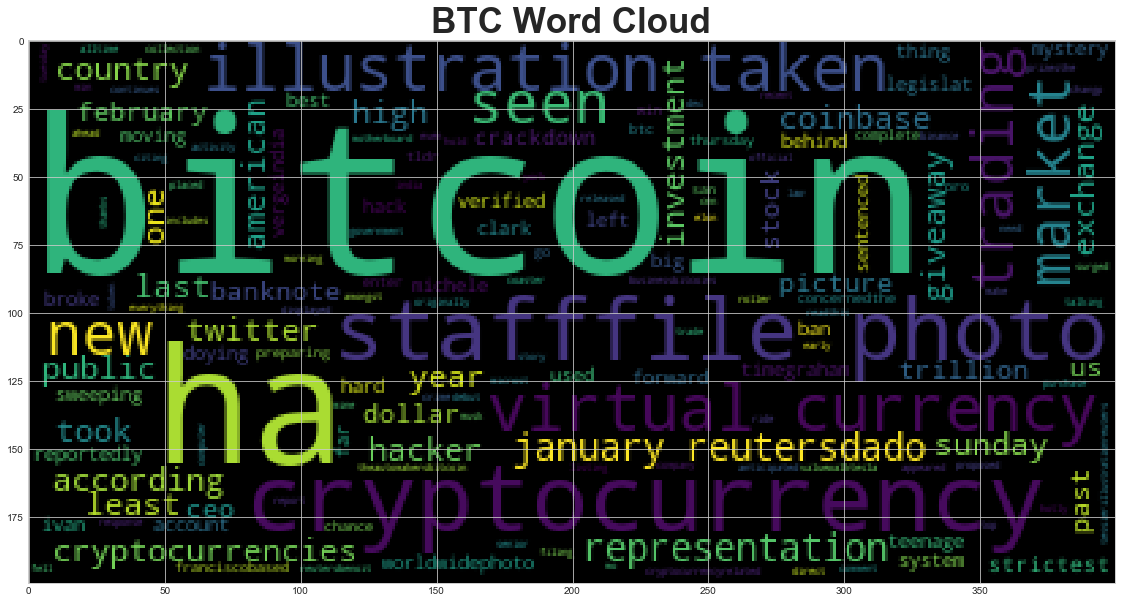

In [42]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(' '.join(btc_tokens))
plt.title("BTC Word Cloud", fontsize = 35, fontweight = 'bold')
plt.imshow(wc)

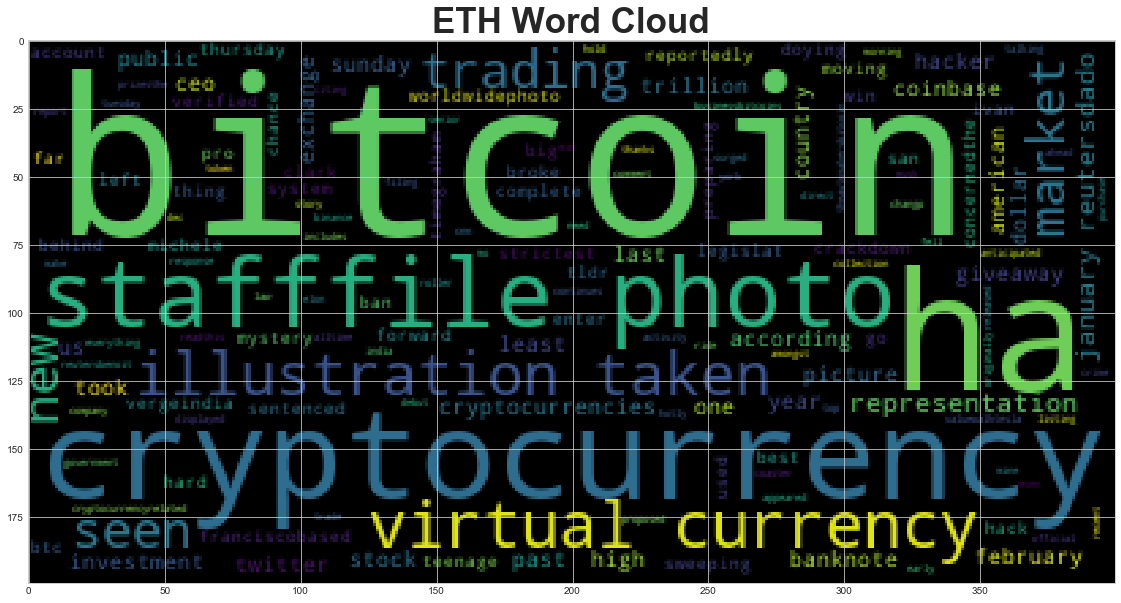

In [44]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(' '.join(eth_tokens))
plt.title("ETH Word Cloud", fontsize = 35, fontweight = 'bold')
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [45]:
import spacy
from spacy import displacy

In [46]:
# Download the language model for SpaCy
#!python -m spacy download en_core_web_sm

In [47]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [48]:
# Concatenate all of the Bitcoin text together
btc_content = ' '.join(btc_df['Text'])
btc_content

'One of the strictest crackdowns worldwide\r\nPhoto by Michele Doying / The Verge\r\nIndia is reportedly moving forward with a sweeping ban on cryptocurrencies. According to Reuters, the countrys legislat… [+1656 chars] The hacker behind last years big Twitter hack\r\n has just been sentenced to hard time.\r\nGraham Ivan Clark, the teenage hacker who broke\r\n into Twitters systems, took over verified accounts, and used t… [+2552 chars] Some things are best left a mystery at least as far as Coinbase is concerned.\xa0\r\nThe San Francisco-based cryptocurrency exchange has been preparing to go public since last year, and in a Thursday pros… [+1953 chars]  TL;DR: Enter the The Complete Bitcoin (BTC) Investment Giveaway for a chance to win over $12,000 in cryptocurrency-related prizes.\r\nThe Bitcoin Investment Giveaway includes everything you need to get… [+1641 chars] A proposed law in India would make it a crime to mine, trade, or even hold cryptocurrencies like bitcoin in the country, 

In [49]:
# Run the NER processor on all of the text
doc = nlp(btc_content)

# Add a title to the document
doc.user_data['title'] = "Bitcoin NER"

In [50]:
# Render the visualization
displacy.render(doc, style='ent')

In [53]:
# List all Entities
for entity in doc.ents:
    print('{} {}'.format(entity.text, entity.label_))

One CARDINAL
Photo PERSON
Michele Doying PERSON
India GPE
Reuters ORG
last years DATE
Twitter PRODUCT
Graham Ivan Clark PERSON
Twitters NORP
Coinbase NORP
San Francisco GPE
last year DATE
Thursday DATE
over $12,000 MONEY
India GPE
Reuters ORG
New York GPE
CNN ORG
above $58,000 MONEY
Sunday DATE
just above $46,000 MONEY
Tuesday DATE
This morning TIME
Coinbase WORK_OF_ART
American NORP
19, 2021 DATE
Elon Musk PERSON
Binance GPE
Changp GPE
Reuters ORG
Dec. 8, 2017 DATE
Benoit Tessier/Illustration ORG
Reuters ORG
Reuters ORG
Bitcoin PERSON
January 21, 2021 DATE
Reuters ORG
Reuters ORG
Feb 21 DATE
Reuters ORG
Sunday DATE
two-month DATE
$1 trillion MONEY
Friday DATE
Reuters ORG
Pristina GPE
Kosovo GPE
June 12, 2018 DATE
HONG KONG GPE
Reuters Breakingviews ORG
Feb. 19, 2021 DATE
Evolve WORK_OF_ART
week of February DATE
North American NORP
4 CARDINAL
4 CARDINAL
Bitcoin PERSON
past $56,000 MONEY
Friday DATE
$1 trillion MONEY
Reuters ORG
Bitcoin PERSON
U.S. GPE
January 8, 2021 DATE
Dado Ru PERSO

---

### Ethereum NER

In [54]:
# Concatenate all of the Ethereum text together
eth_content = ' '.join(eth_df['Text'])
eth_content

'Famed auction house Christies just sold its first purely digital piece of art for a whopping $69 million. For that price, the buyer got a digital file of a collage of 5,000 images and a complex legac… [+12891 chars] One of the strictest crackdowns worldwide\r\nPhoto by Michele Doying / The Verge\r\nIndia is reportedly moving forward with a sweeping ban on cryptocurrencies. According to Reuters, the countrys legislat… [+1656 chars] Here\'s everything you need to know about non-fungible tokens, the latest cryptocurrency craze.\r\nRead the full story here. (And learn even more about NFTs here.) OpenSea has been one of a handful of NFT marketplaces to explode in popularity in recent weeks as collectors wade into the trading of non-fungible tokens on the blockchain. While new startups have be… [+2529 chars] NFTs are the latest cryptocurrency rage these days, with bands like Kings of Leon releasing their next album as limited edition "golden tickets," and NBA digital collectibles being sold

In [55]:
# Run the NER processor on all of the text
doc = nlp(eth_content)

# Add a title to the document
doc.user_data['title'] = "Ethereum NER"

In [56]:
# Render the visualization
displacy.render(doc, style="ent")

In [57]:
# List all Entities
for entity in doc.ents:
    print('{} {}'.format(entity.text, entity.label_))

Christies ORG
first ORDINAL
$69 million MONEY
5,000 CARDINAL
Photo PERSON
Michele Doying PERSON
India GPE
Reuters ORG
NFT ORG
recent weeks DATE
these days DATE
Kings PERSON
NBA ORG
millions CARDINAL
Ethereum ORG
first ORDINAL
Christie's ORG
NFT ORG
a few days DATE
Chris Torres PERSON
MetaMask PRODUCT
one CARDINAL
Ethereum ORG
September 2020 DATE
about $5.7 million MONEY
7.34% PERCENT
the week ending 21st February DATE
11.65% PERCENT
the previous week DATE
Ethereum ended ORG
the week DATE
1,935.57 MONEY
the week DATE
Coinbase NORP
San Francisco GPE
last year DATE
Thursday DATE
Bitfinex ORG
Bitfinex ORG
millions of dollars MONEY
Reuters ORG
SINGAPORE PERSON
Reuters ORG
Asian NORP
Saturday DATE
two-month DATE
$1 trillion MONEY
a day earlier DATE
World FX ORG
Kevin Buckland PERSON
Reuters ORG
Meitu ORG
Hong Kong GPE
China GPE
March 24, 2017 DATE
Bobby Yip PERSON
HONG KONG GPE
Reuters ORG
Hong Ko PERSON
more than a year ago DATE
Ethereum ORG
over $12,000 MONEY
India GPE
Reuters ORG
Reuters 

---